# This is a the Test Simulation for MWM GG Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
import astropy.units as u
%matplotlib inline

## Read in Target and Cadence Tables

In [2]:
north_target_tab = Table.read('workspace/target_files/GG/GG_fps_north_target.fits')
south_target_tab = Table.read('workspace/target_files/GG/GG_fps_south_target.fits')
cadence_tab = Table.read('workspace/target_files/GG/GG_fps_cadence.fits')
north_target_tab

ra,dec,cadence,type,priority,value
float64,float64,bytes2,bytes2,int32,float32
135.94619111,38.7420391967,GG,GG,0,0.0
146.631941202,57.1282068023,GG,GG,0,0.0
167.653155934,11.3016043151,GG,GG,0,0.0
167.235123872,20.2577666404,GG,GG,0,0.0
142.735739895,44.6838887037,GG,GG,0,0.0
138.959748265,44.6979310925,GG,GG,0,0.0
150.86526745,41.3047153269,GG,GG,0,0.0
179.051326127,15.7288230116,GG,GG,0,0.0
142.775605308,25.0470957628,GG,GG,0,0.0


In [3]:
south_target_tab

ra,dec,cadence,type,priority,value
float64,float64,bytes2,bytes2,int32,float32
56.8105296402,-74.2384847947,GG,GG,0,0.0
92.8121901174,-65.5889205932,GG,GG,0,0.0
97.7546335233,-66.8706227317,GG,GG,0,0.0
119.906391845,-60.5870165036,GG,GG,0,0.0
85.8076125278,-46.4537778648,GG,GG,0,0.0
45.8683660495,-58.9330978912,GG,GG,0,0.0
155.114289886,-72.1301470859,GG,GG,0,0.0
110.440188234,-56.2530117402,GG,GG,0,0.0
115.13694946,-64.3232700502,GG,GG,0,0.0


/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


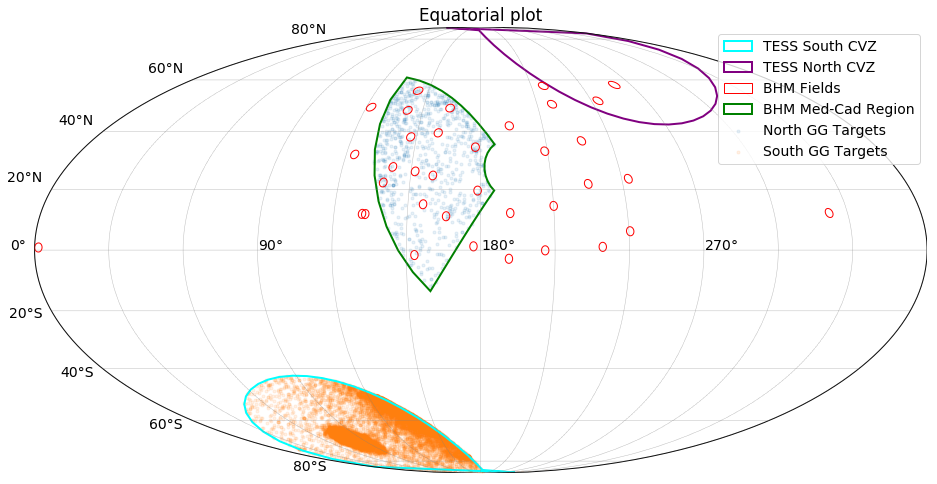

In [4]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot WD Targets
nggx,nggy = bmap(north_target_tab['ra'],north_target_tab['dec'])
bmap.scatter(nggx,nggy,marker='.',label='North GG Targets',alpha=0.1)
sggx,sggy = bmap(south_target_tab['ra'],south_target_tab['dec'])
bmap.scatter(sggx,sggy,marker='.',label='South GG Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


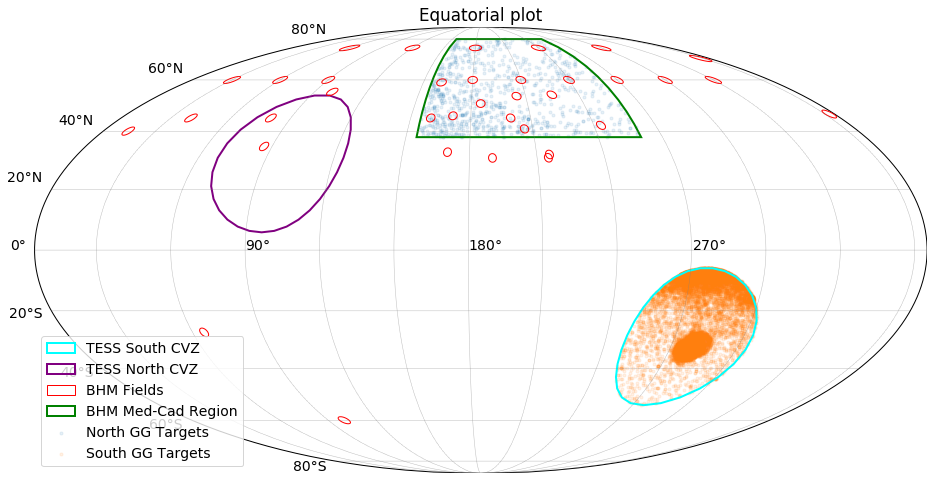

In [5]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_gal()
ngg_coord_fk5 = SkyCoord(north_target_tab['ra'],north_target_tab['dec'],unit=(u.deg,u.deg),frame="fk5")
ngg_coord_gal = ngg_coord_fk5.transform_to(Galactic())
nggx,nggy = bmap(ngg_coord_gal.l,ngg_coord_gal.b)
bmap.scatter(nggx,nggy,marker='.',label='North GG Targets',alpha=0.1)
sgg_coord_fk5 = SkyCoord(south_target_tab['ra'],south_target_tab['dec'],unit=(u.deg,u.deg),frame="fk5")
sgg_coord_gal = sgg_coord_fk5.transform_to(Galactic())
sggx,sggy = bmap(sgg_coord_gal.l,sgg_coord_gal.b)
bmap.scatter(sggx,sggy,marker='.',label='South GG Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Updating Target Table

In [6]:
north_target_tab['priority'] = np.repeat(np.array(75,dtype='int32'),len(north_target_tab))
north_target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(north_target_tab))
south_target_tab['priority'] = np.repeat(np.array(75,dtype='int32'),len(south_target_tab))
south_target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(south_target_tab))

In [7]:
north_target_tab

ra,dec,cadence,type,priority,value
float64,float64,bytes2,bytes2,int32,float32
135.94619111,38.7420391967,GG,GG,75,1.0
146.631941202,57.1282068023,GG,GG,75,1.0
167.653155934,11.3016043151,GG,GG,75,1.0
167.235123872,20.2577666404,GG,GG,75,1.0
142.735739895,44.6838887037,GG,GG,75,1.0
138.959748265,44.6979310925,GG,GG,75,1.0
150.86526745,41.3047153269,GG,GG,75,1.0
179.051326127,15.7288230116,GG,GG,75,1.0
142.775605308,25.0470957628,GG,GG,75,1.0


In [8]:
south_target_tab

ra,dec,cadence,type,priority,value
float64,float64,bytes2,bytes2,int32,float32
56.8105296402,-74.2384847947,GG,GG,75,1.0
92.8121901174,-65.5889205932,GG,GG,75,1.0
97.7546335233,-66.8706227317,GG,GG,75,1.0
119.906391845,-60.5870165036,GG,GG,75,1.0
85.8076125278,-46.4537778648,GG,GG,75,1.0
45.8683660495,-58.9330978912,GG,GG,75,1.0
155.114289886,-72.1301470859,GG,GG,75,1.0
110.440188234,-56.2530117402,GG,GG,75,1.0
115.13694946,-64.3232700502,GG,GG,75,1.0


In [9]:
north_target_tab.write('GG_fps_north_target.fits',overwrite=True)
south_target_tab.write('GG_fps_south_target.fits',overwrite=True)

## Update Cadence Table

In [10]:
cadence_tab

cadence,nepochs,delta,softness,lunation,instrument [1]
bytes2,int32,float32,float32,float32,bytes6
GG,1,0.0,0.0,1.0,apogee


In [11]:
cadence_tab['cadence'] = ['GG']
cadence_tab['nepochs'] = np.array([1],dtype='int32')
cadence_tab['delta'] = [np.array([0.0],dtype='float32')]
cadence_tab['softness'] = [np.array([1.0],dtype='float32')]
cadence_tab['lunation'] = [np.repeat(np.array([1.0],dtype='float32'),1)]
cadence_tab['instrument'] = [np.repeat('apogee',1)]

In [12]:
cadence_tab

cadence,nepochs,delta [1],softness [1],lunation [1],instrument [1]
str2,int32,float32,float32,float32,str6
GG,1,0.0,1.0,1.0,apogee


In [13]:
cadence_tab.write('GG_fps_cadence.fits',overwrite=True)